In [12]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft

expts = ["full-10","beamless-10","smooth-10","beamless-20","smooth-20","full-20","full-40","beamless-40","smooth-40"]
# client = Client(threads_per_worker=1)
# client

In [48]:
full10 = tt.collect_data(
    "full-10",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
smooth10 = tt.collect_data(
    "smooth-10",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
beamless10 = tt.collect_data(
    "beamless-10",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()

full20 = tt.collect_data(
    "full-20",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
smooth20 = tt.collect_data(
    "smooth-20",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
beamless20 = tt.collect_data(
    "beamless-20",
    rawdata = ["rho"],
    timerange = (22000,22000 + 365 * 5 * 24)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()

full40 = tt.collect_data(
    "full-40",
    rawdata = ["rho"],
    timerange = (4216,4216 + 233 * 35)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
smooth40 = tt.collect_data(
    "smooth-40",
    rawdata = ["rho"],
    timerange = (4216,4216 + 233 * 35)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()
beamless40 = tt.collect_data(
    "beamless-40",
    rawdata = ["rho"],
    timerange = (4216,4216 + 233 * 35)
).sel(xb = slice(50,250),yb = slice(-50,100)).mean("time").load()




loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.


In [123]:
# full10.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/full10.nc")
# beamless10.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless10.nc")
# smooth10.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth10.nc")
# full20.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/full20.nc")
# beamless20.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless20.nc")
# smooth20.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth20.nc")
# full40.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/full40.nc")
# beamless40.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless40.nc")
# smooth40.to_netcdf("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth40.nc")

full10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/full10.nc")
beamless10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless10.nc")
smooth10 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth10.nc")
full20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/full20.nc")
beamless20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless20.nc")
smooth20 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth20.nc")
full40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/full40.nc")
beamless40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/beamless40.nc")
smooth40 = xr.open_dataset("/g/data/nm03/ab8992/postprocessed/shelf_density/smooth40.nc")

## Try using same code as dissipation

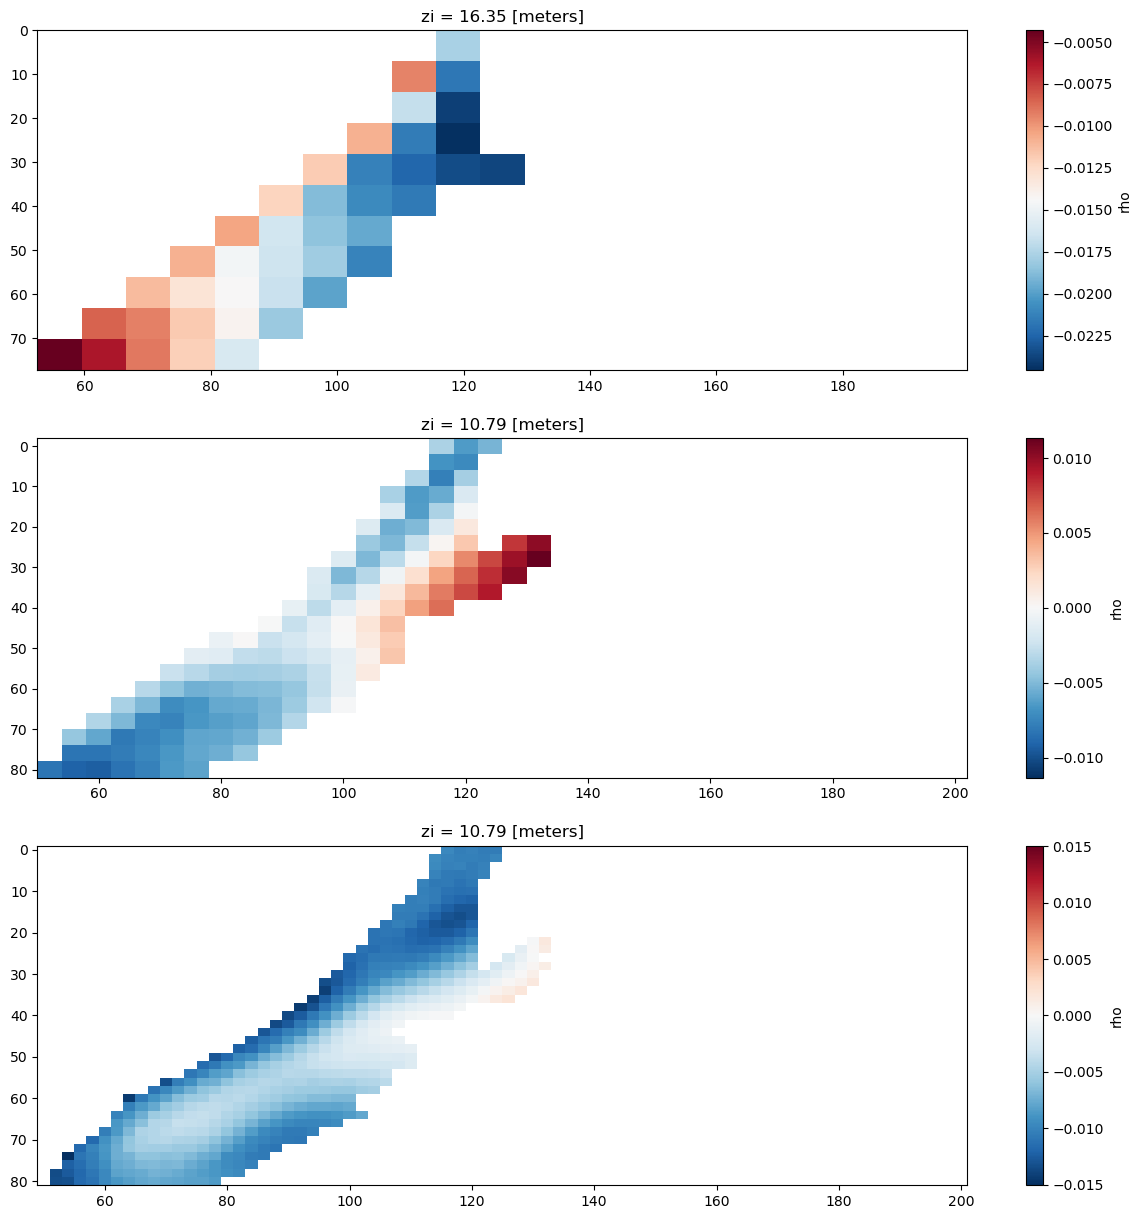

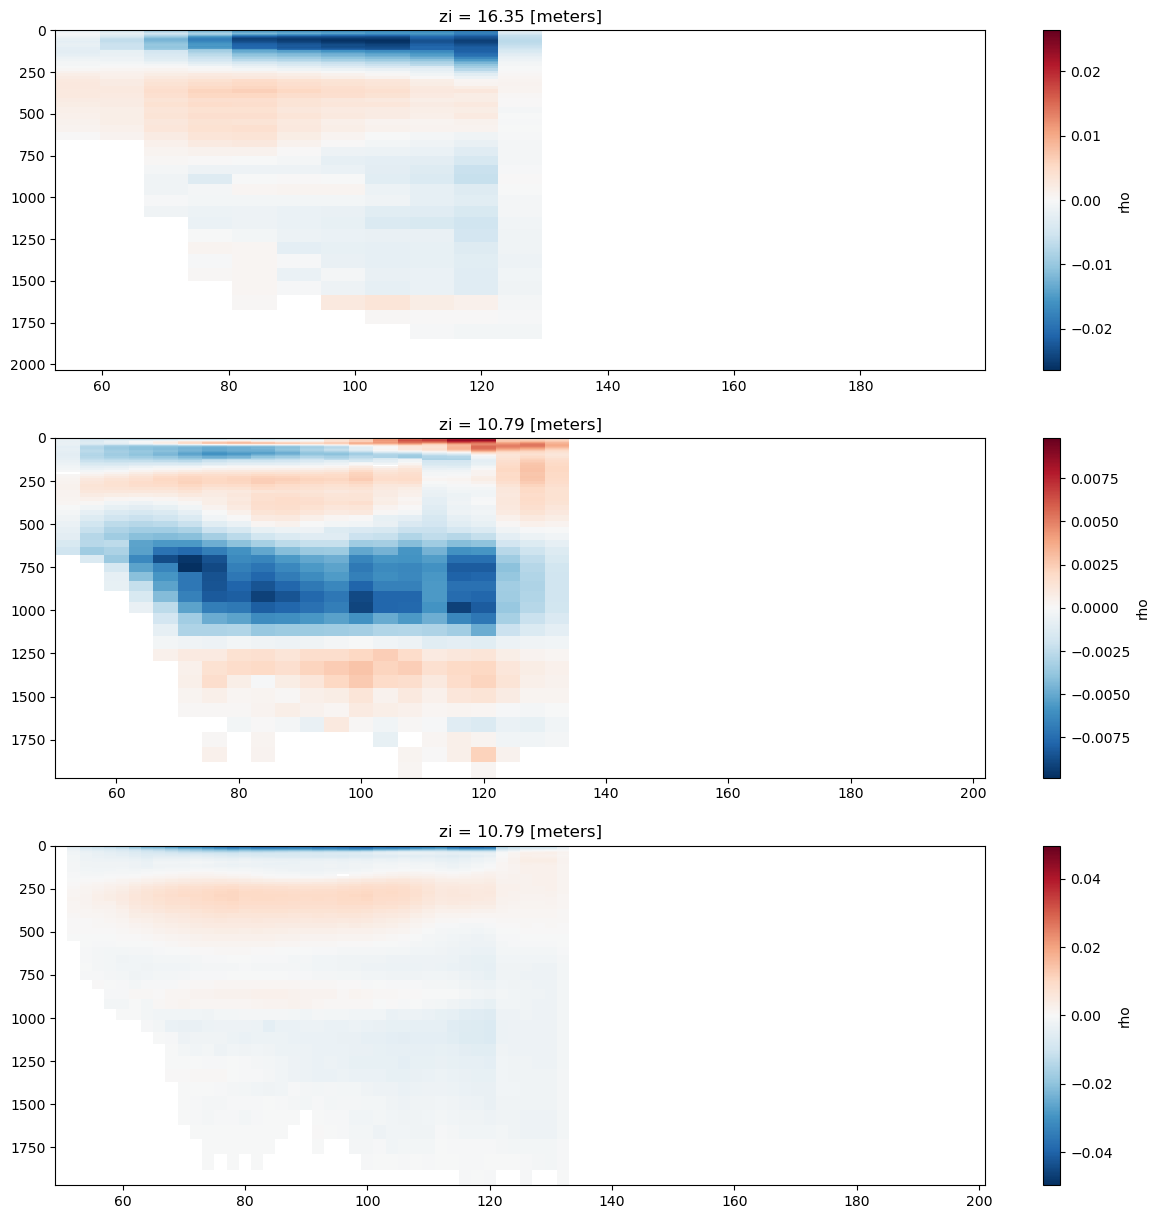

In [128]:
def ShelfMask(data):
    return data.where(
        (data.bathy < 2000) & (data.xb < 200) & (data.bathy > 500),np.nan
    ).sel(yb = slice(0,80),zl = slice(0,2000))


names = ["SMOOTH","BEAMLESS"]
vmax = [0.01,0.002]
fig,ax = plt.subplots(3,figsize = (15,15))
out = (ShelfMask(beamless10) - ShelfMask(smooth10)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[0],add_colorbar = True,cmap = "RdBu_r")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].invert_yaxis()

out = (ShelfMask(beamless20) - ShelfMask(smooth20)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[1],add_colorbar = True,cmap = "RdBu_r")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].invert_yaxis()

out = (ShelfMask(beamless40) - ShelfMask(smooth40)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[2],add_colorbar = True,cmap = "RdBu_r")
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].invert_yaxis()



names = ["SMOOTH","BEAMLESS"]
vmax = [0.01,0.002]
fig,ax = plt.subplots(3,figsize = (15,15))
out = (ShelfMask(beamless10) - ShelfMask(smooth10)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[0],add_colorbar = True,cmap = "RdBu_r")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].invert_yaxis()

out = (ShelfMask(beamless20) - ShelfMask(smooth20)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[1],add_colorbar = True,cmap = "RdBu_r")
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].invert_yaxis()

out = (ShelfMask(beamless40) - ShelfMask(smooth40)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
out.where(out != 0,np.nan).plot(ax = ax[2],add_colorbar = True,cmap = "RdBu_r")
ax[2].set_ylabel("")
ax[2].set_xlabel("")
ax[2].invert_yaxis()


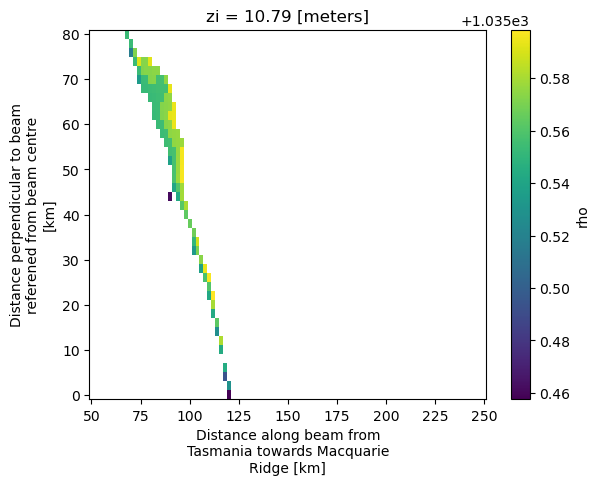

In [136]:
ShelfMask(smooth40).mean("zl").rho.plot()

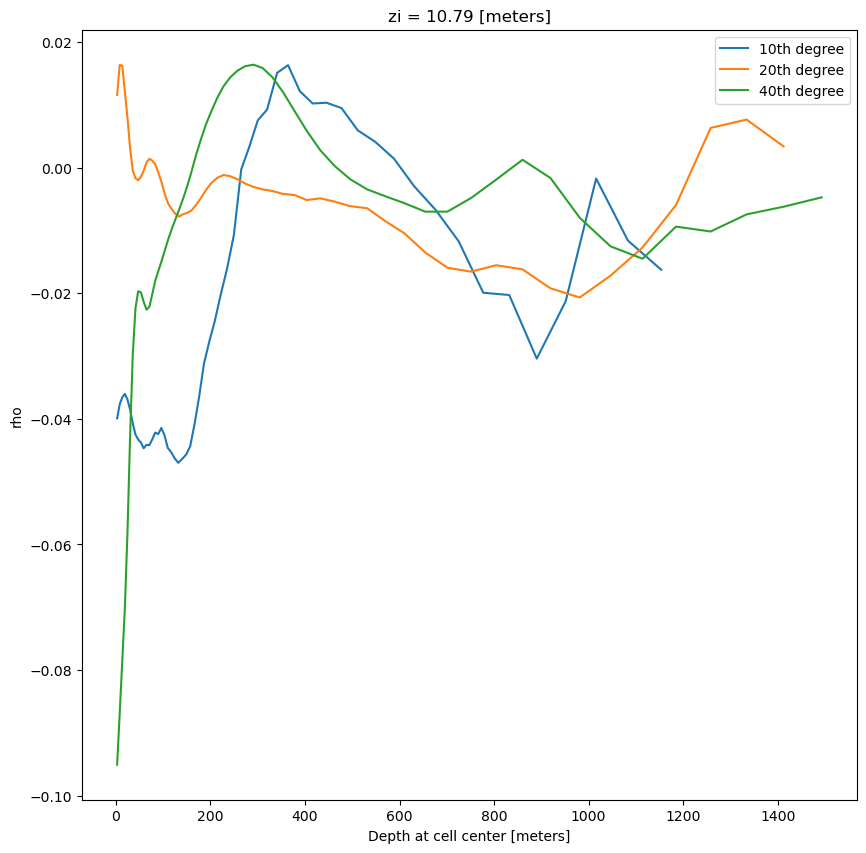

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x14d7015e2cb0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/_weakrefset.py", line 45, in _remove
    self.data.discard(item)
KeyboardInterrupt: 


In [140]:
def ShelfMask(data):
    return data.where(
        (data.bathy < 1600) & (data.xb < 200) & (data.bathy > 1400),np.nan
    ).sel(yb = slice(0,40),zl = slice(0,2000))

fig,ax = plt.subplots(1,figsize = (10,10))

(ShelfMask(beamless10) - ShelfMask(smooth10)).rho.mean("yb").mean("xb").plot(ax = ax,label = "10th degree")
(ShelfMask(beamless20) - ShelfMask(smooth20)).rho.mean("yb").mean("xb").plot(ax = ax,label = "20th degree")
(ShelfMask(beamless40) - ShelfMask(smooth40)).rho.mean("yb").mean("xb").plot(ax = ax,label = "40th degree")
plt.legend()

In [42]:
## Check number of outputs available
#100 for beamless-40. That's upper limit
hours = 4216 + 233 * 35
outputs = hours / (24 * 5)
outputs
total = (233 * 35) / 24
print(outputs,total)

103.09166666666667 339.7916666666667


In [44]:
## Check number of outputs available
#100 for beamless-40. That's upper limit
hours = 22000 + 233 * 35
outputs = hours / (24 * 15)
outputs
total = (233 * 35) / 24
print(outputs,total)

83.76388888888889 339.7916666666667


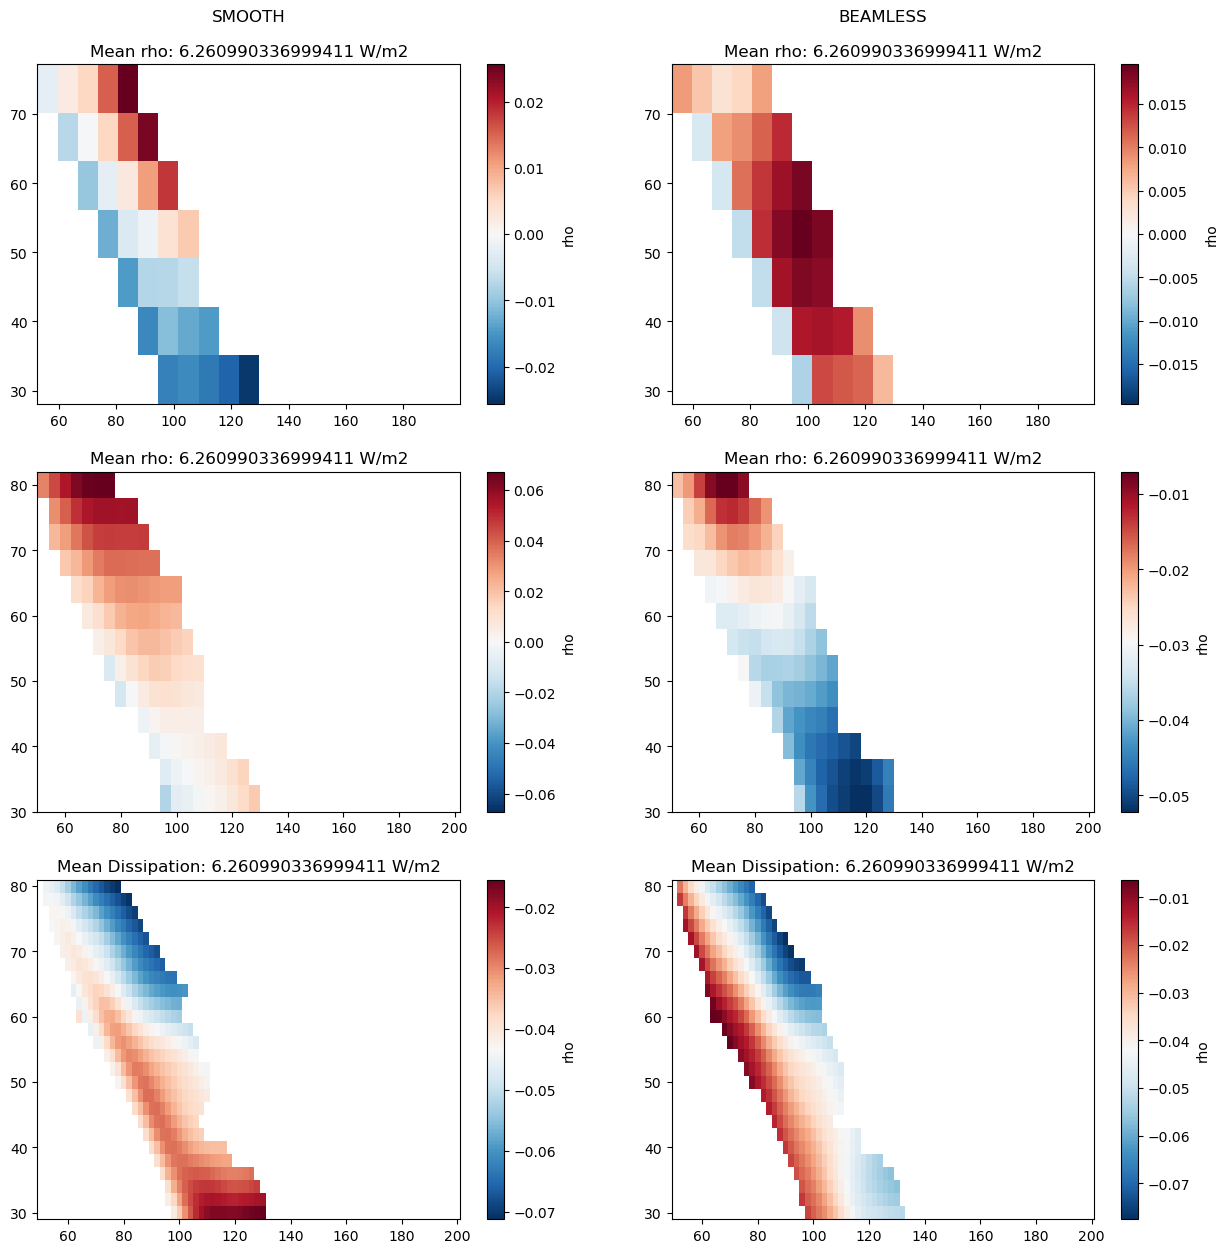

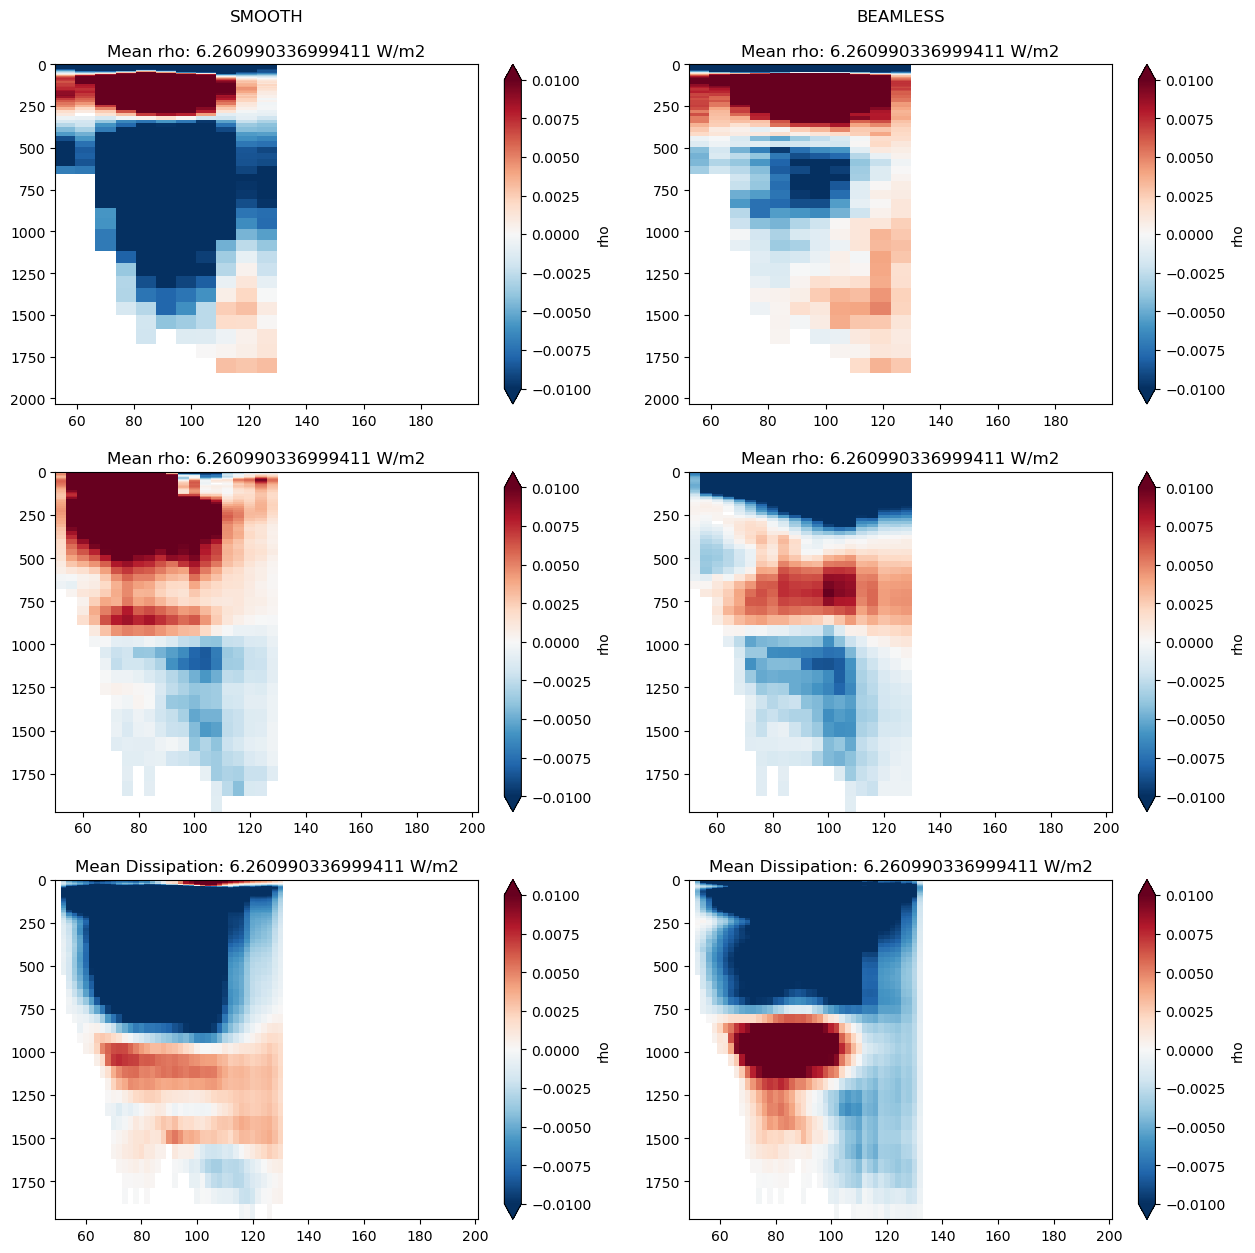

In [122]:
def ShelfMask(data):
    return data.where(
        (data.bathy < 2000) & (data.xb < 200) & (data.bathy > 500),np.nan
    ).sel(yb = slice(30,80),zl = slice(0,2000))


names = ["SMOOTH","BEAMLESS"]
vmax = [0.01,0.002]
fig,ax = plt.subplots(3,2,figsize = (15,15))
for j,i in enumerate([smooth10,beamless10]):
    out = (ShelfMask(i) - ShelfMask(full10)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[0,j],add_colorbar = True,cmap = "RdBu_r")
    ax[0,j].set_title(f"{names[j]}\n\nMean rho: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
for j,i in enumerate([smooth20,beamless20]):
    out = (ShelfMask(i) - ShelfMask(full20)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[1,j],add_colorbar = True,cmap = "RdBu_r")
    ax[1,j].set_title(f"Mean rho: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
for j,i in enumerate([smooth40,beamless40]):
    out = (ShelfMask(i) - ShelfMask(full40)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[2,j],add_colorbar = True,cmap = "RdBu_r")
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")


vmax = [0.01,0.01]
fig,ax = plt.subplots(3,2,figsize = (15,15))
for j,i in enumerate([smooth10,beamless10]):
    out = (ShelfMask(i) - ShelfMask(full10)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[0,j],add_colorbar = True,cmap = "RdBu_r",vmin = -vmax[j],vmax = vmax[j])
    ax[0,j].set_title(f"{names[j]}\n\nMean rho: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
    ax[0,j].invert_yaxis()
for j,i in enumerate([smooth20,beamless20]):
    out = (ShelfMask(i) - ShelfMask(full20)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[1,j],add_colorbar = True,cmap = "RdBu_r",vmin = -vmax[j],vmax = vmax[j])
    ax[1,j].set_title(f"Mean rho: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
    ax[1,j].invert_yaxis()
for j,i in enumerate([smooth40,beamless40]):
    out = (ShelfMask(i) - ShelfMask(full40)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[2,j],add_colorbar = True,cmap = "RdBu_r",vmin = -vmax[j],vmax = vmax[j])
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].invert_yaxis()
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")

In [ ]:
def ShelfMask(data,isobath = 3000):
    return data.where(
        (data.bathy > 3000) & (data.xb < 200) & (data.bathy < 50),np.nan
    )
# def ShelfMask(data,bathy):
#     return 1e-6 * data.where(
#         (bathy > -3000) & (data.xb < 200) & (bathy < -50),np.nan
#     )

ShelfMask(full40).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "full40")
ShelfMask(beamless40).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "beamless40")
ShelfMask(smooth40).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "smooth40")
plt.figure()

ShelfMask(full20).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "full20")
ShelfMask(beamless20).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "beamless20")
ShelfMask(smooth20).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "smooth20")
plt.figure()

ShelfMask(full10).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "full10")
ShelfMask(beamless10).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "beamless10")
ShelfMask(smooth10).sel(xb = slice(0,250),yb = slice(-20,20)).rho.mean("xb").mean("yb").plot(label = "smooth10")

: 

: 

## TROUBLESHOOTING!

The initial conditions appear to be slightly different for the full expts and beamless etc

In [79]:
# ICbeamless40 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/beamless-40/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICfull40 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-40/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICsmooth40 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/smooth-40/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICbeamless20 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/beamless-20/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
ICsmooth20 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/smooth-20/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICfull20 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-20/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICbeamless10 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/smooth-10/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()
# ICfull10 = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/full-10/output000/rho/*.nc").isel(time = 0).sel(xb = slice(0,250)).load()

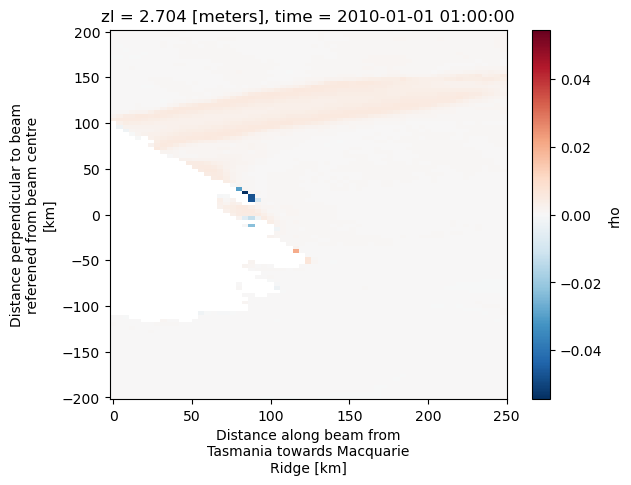

In [52]:
(ICfull20 - ICbeamless20).isel(zl = 0).rho.plot()


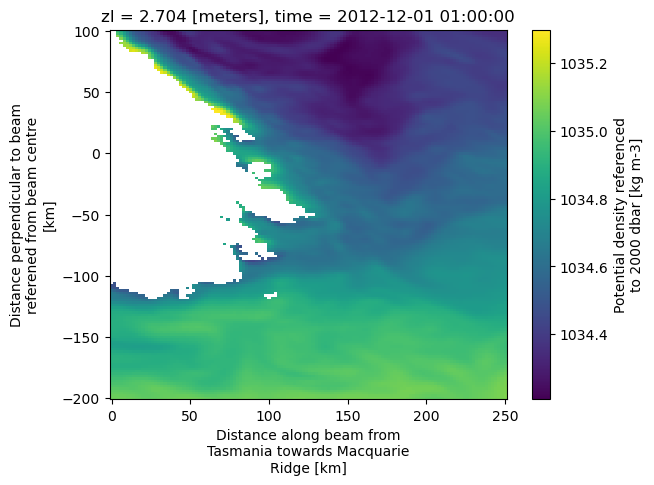

In [69]:
(ICfull40).isel(zl = 0).sel(yb = slice(-200,100)).rho.plot()


In [71]:
(ICbeamless40).isel(zl = 20).sel(yb = slice(-200,100)).rho.values


array([[1035.5802, 1035.5823, 1035.5847, ..., 1035.622 , 1035.642 ,
        1035.6539],
       [1035.5768, 1035.579 , 1035.5815, ..., 1035.6193, 1035.6389,
        1035.6525],
       [1035.5751, 1035.5773, 1035.58  , ..., 1035.6152, 1035.6364,
        1035.6511],
       ...,
       [      nan,       nan,       nan, ..., 1035.5265, 1035.5231,
        1035.5198],
       [      nan,       nan,       nan, ..., 1035.5244, 1035.5205,
        1035.5168],
       [      nan,       nan,       nan, ..., 1035.5239, 1035.5199,
        1035.5164]], dtype=float32)

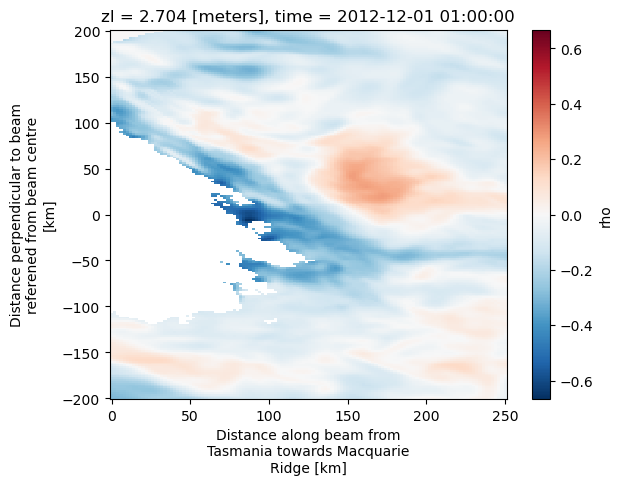

In [75]:
(ICsmooth40 - ICfull40).isel(zl = 0).rho.plot()


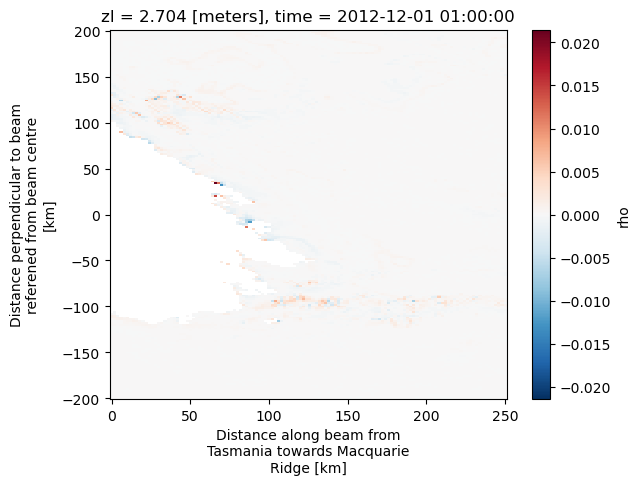

In [64]:
(ICsmooth40 - ICbeamless40).isel(zl = 0).rho.plot()


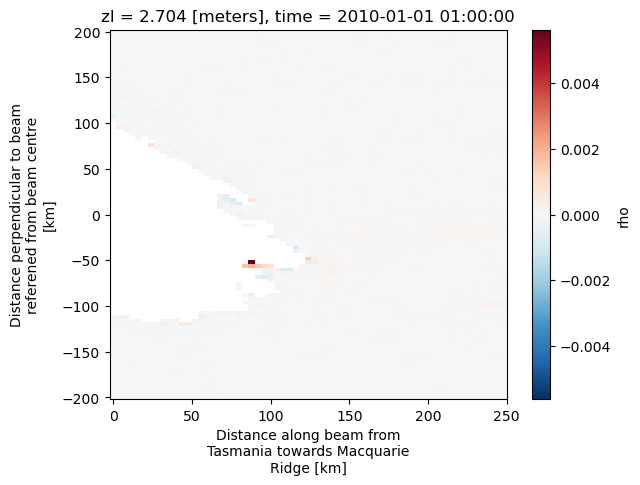

In [82]:
(ICbeamless20 - ICsmooth20).isel(zl = 0).rho.plot()

## Select shelf

## Instead, see the change in density for each expt from initial to later on?

In [115]:
def get_change(expt):
    with (
        tt.collect_data(
        expt,
        rawdata = ["rho"],
        timerange = (0,180 * 24)
    ).sel(xb = slice(50,250),yb = slice(-50,100)) as t1,
    tt.collect_data(
        expt,
        rawdata = ["rho"],
        timerange = (180 * 24,360 * 24)
    ).sel(xb = slice(50,250),yb = slice(-50,100)) as t2
    ):
        return (t2.mean("time") - t1.mean("time")).load()
        
        




full10 = get_change("full-10")
smooth10 = get_change("smooth-10")
beamless10 = get_change("beamless-10")

full20 = get_change("full-20")
smooth20 = get_change("smooth-20")
beamless20 = get_change("beamless-20")

full40 = get_change("full-40")
smooth40 = get_change("smooth-40")
beamless40 = get_change("beamless-40")

loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.
loading rho...	done.


In [118]:
full10 = xr.merge([full10.rho,rho_full10.bathy])
smooth10 = xr.merge([smooth10.rho,rho_smooth10.bathy])
beamless10 = xr.merge([beamless10.rho,rho_beamless10.bathy])
full20 = xr.merge([full20.rho,rho_full20.bathy])
smooth20 = xr.merge([smooth20.rho,rho_smooth20.bathy])
beamless20 = xr.merge([beamless20.rho,rho_beamless20.bathy])
full40 = xr.merge([full40.rho,rho_full40.bathy])
smooth40 = xr.merge([smooth40.rho,rho_smooth40.bathy])
beamless40 = xr.merge([beamless40.rho,rho_beamless40.bathy])

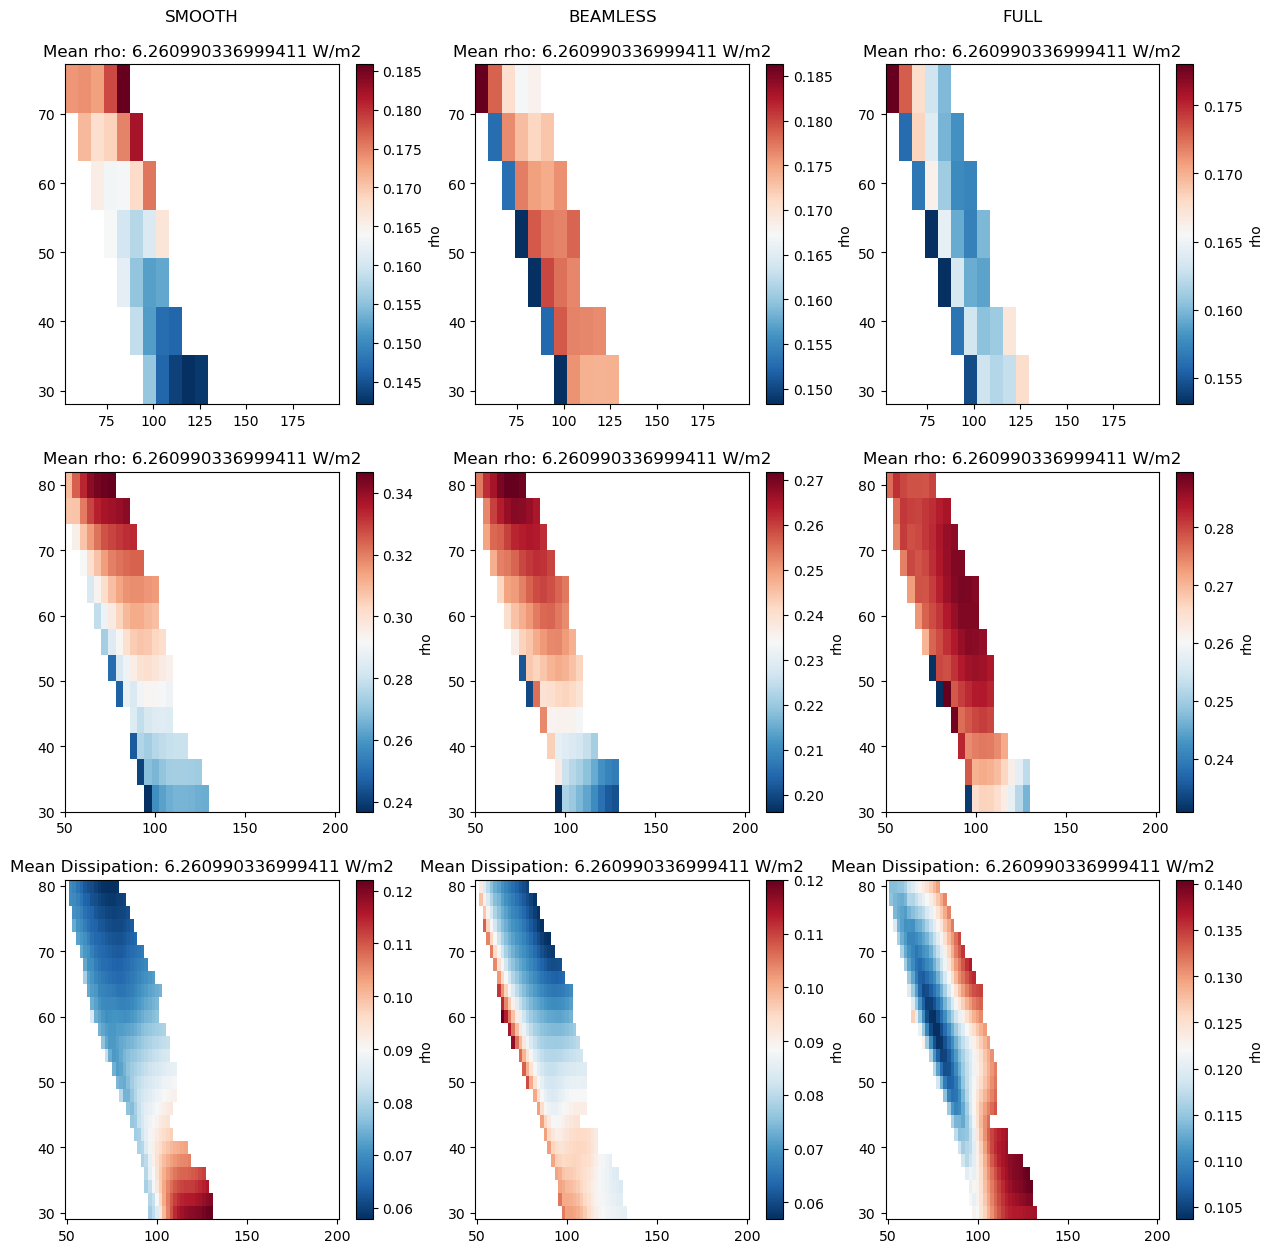

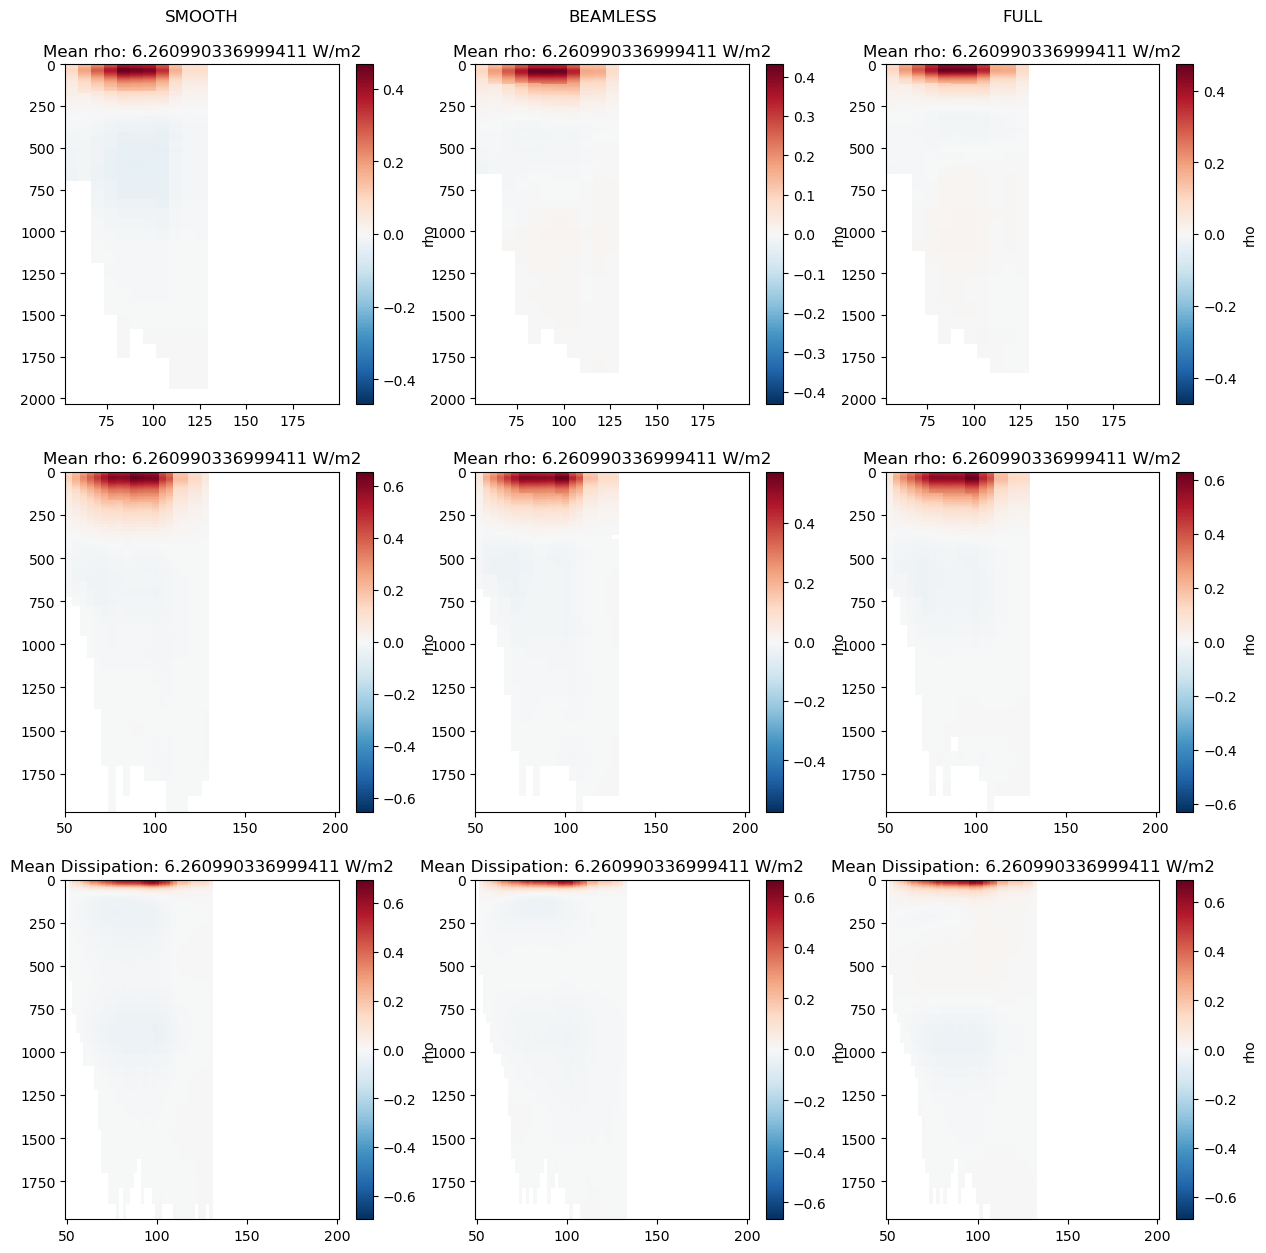

In [121]:
def ShelfMask(data):
    return data.where(
        (data.bathy < 2000) & (data.xb < 200) & (data.bathy > 500),np.nan
    ).sel(yb = slice(30,80),zl = slice(0,2000))


names = ["SMOOTH","BEAMLESS","FULL"]
vmax = [0.01,0.002]
fig,ax = plt.subplots(3,3,figsize = (15,15))
for j,i in enumerate([smooth10,beamless10,full10]):
    out = (ShelfMask(i)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[0,j],add_colorbar = True,cmap = "RdBu_r")
    ax[0,j].set_title(f"{names[j]}\n\nMean rho: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
for j,i in enumerate([smooth20,beamless20,full20]):
    out = (ShelfMask(i)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[1,j],add_colorbar = True,cmap = "RdBu_r")
    ax[1,j].set_title(f"Mean rho: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
for j,i in enumerate([smooth40,beamless40,full40]):
    out = (ShelfMask(i)).rho.fillna(0).mean("zl").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[2,j],add_colorbar = True,cmap = "RdBu_r")
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")


vmax = [0.01,0.01]
fig,ax = plt.subplots(3,3,figsize = (15,15))
for j,i in enumerate([smooth10,beamless10,full10]):
    out = (ShelfMask(i)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[0,j],add_colorbar = True,cmap = "RdBu_r")
    ax[0,j].set_title(f"{names[j]}\n\nMean rho: {v} W/m2")
    ax[0,j].set_ylabel("")
    ax[0,j].set_xlabel("")
    ax[0,j].invert_yaxis()
for j,i in enumerate([smooth20,beamless20,full20]):
    out = (ShelfMask(i)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[1,j],add_colorbar = True,cmap = "RdBu_r")
    ax[1,j].set_title(f"Mean rho: {v} W/m2")
    ax[1,j].set_ylabel("")
    ax[1,j].set_xlabel("")
    ax[1,j].invert_yaxis()
for j,i in enumerate([smooth40,beamless40,full40]):
    out = (ShelfMask(i)).rho.fillna(0).mean("yb").sel(xb = slice(50,200))
    out.where(out != 0,np.nan).plot(ax = ax[2,j],add_colorbar = True,cmap = "RdBu_r")
    ax[2,j].set_ylabel("")
    ax[2,j].set_xlabel("")
    ax[2,j].invert_yaxis()
    ax[2,j].set_title(f"Mean Dissipation: {v} W/m2")